In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import os

# Path to your dataset
base_dir = 'C:/Users/asus/OneDrive/Desktop/Edu Internship/modified-dataset'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load base model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Epoch 1/10


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.4743 - loss: 1.6163 - val_accuracy: 0.8433 - val_loss: 0.5472
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.9088 - loss: 0.3936 - val_accuracy: 0.8567 - val_loss: 0.4376
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.9486 - loss: 0.2479 - val_accuracy: 0.9000 - val_loss: 0.3421
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 537s 7s/step - accuracy: 0.9855 - loss: 0.1354 - val_accuracy: 0.9133 - val_loss: 0.3256
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 311s 4s/step - accuracy: 0.9936 - loss: 0.0931 - val_accuracy: 0.8933 - val_loss: 0.3036
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.9982 - loss: 0.0665 - val_accuracy: 0.9000 - val_loss: 0.2992
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9996 - loss: 0.0481 - val_accuracy: 0.9067 - val_loss: 0.2890
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 1.0000 - loss: 0.0389 - val_accuracy: 0.9100 - val_loss: 0.

Found 300 images belonging to 10 classes.


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8914 - loss: 0.3596
Test Accuracy: 0.90
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step

 Classification Report:
                 precision    recall  f1-score   support

        Battery       1.00      0.83      0.91        30
       Keyboard       0.86      1.00      0.92        30
      Microwave       0.82      0.90      0.86        30
         Mobile       0.93      0.87      0.90        30
          Mouse       0.97      0.93      0.95        30
            PCB       0.85      0.77      0.81        30
         Player       0.93      0.87      0.90        30
        Printer       0.87      0.90      0.89        30
     Television       0.80      0.93      0.86        30
Washing Machine       1.00      0.97      0.98        30

       accuracy                           0.90       300
      macro avg       0.90      0.90      0.90       300
   weighted avg       0.90      0.90      0.90       300


 Confusion Matrix:
[[25  1  0  0  0  1  1

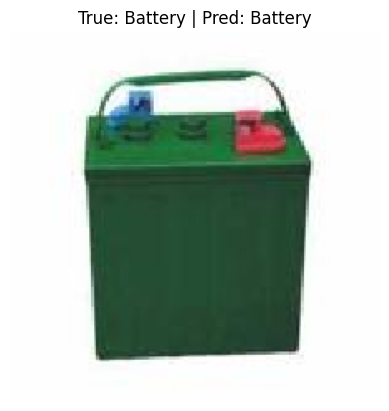

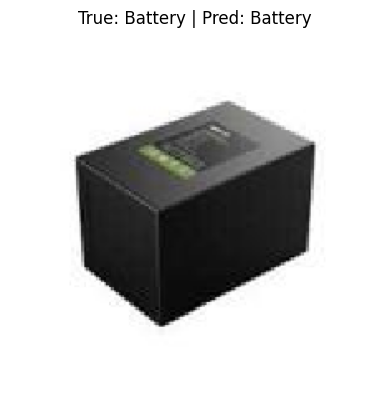

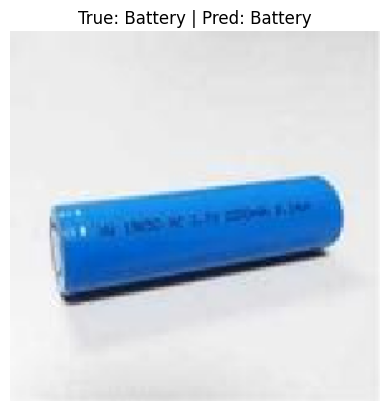

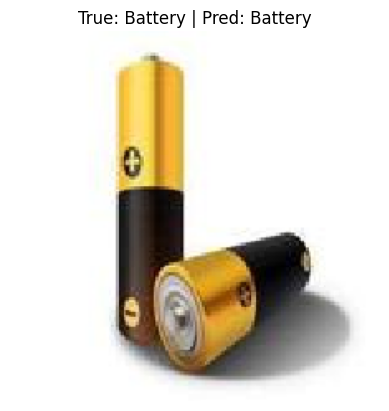

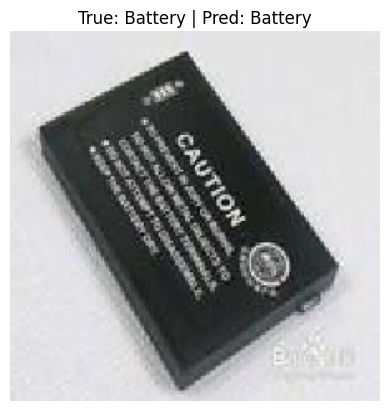

In [ ]:
# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on test data
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Visualize predictions
print("\n Sample Predictions:")
images, labels = next(test_generator)
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

for i in range(5):
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"True: {class_labels[true_classes[i]]} | Pred: {class_labels[predicted_classes[i]]}")
    plt.show()

In [1]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `model` and `test_generator` are already defined and loaded

# Predict test labels
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes

# Class labels (e.g., ['laptop', 'mobile', 'tv'])
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Print confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


NameError: name 'model' is not defined

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 0.9133 - val_loss: 0.2720
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 358s 5s/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.9133 - val_loss: 0.2622
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 0.9067 - val_loss: 0.2715
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.9033 - val_loss: 0.2764
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9200 - val_loss: 0.2581
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.9167 - val_loss: 0.2603
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.9100 - val_loss: 0.2660
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9000 - v

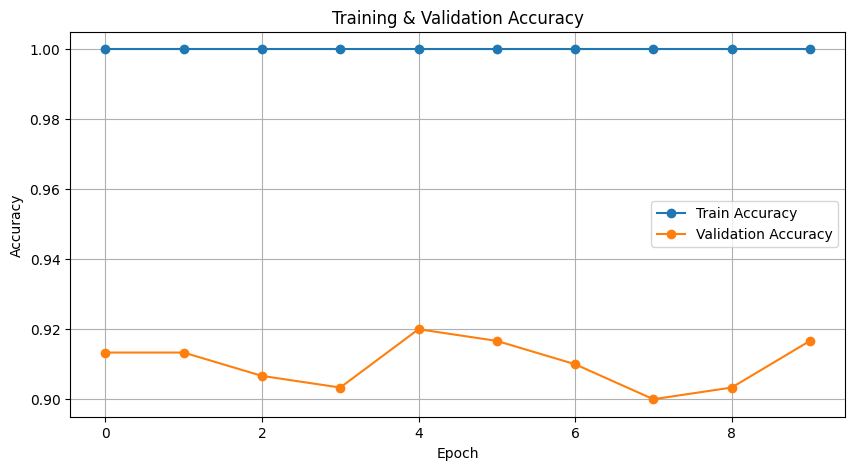

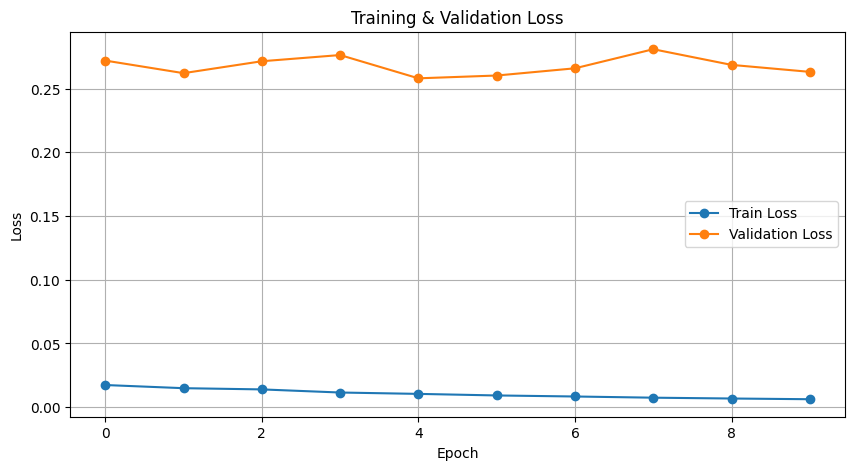

In [5]:
import matplotlib.pyplot as plt
history = model.fit(train_generator, validation_data=val_generator, epochs=10)
history.history['accuracy']
history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
